# Non Parametric Tests

Many statistical tests require that your data follow a normal distribution. Sometimes this is not the case. In some instances it is possible to transform the data to make them follow a normal distribution; in others this is not possible or the sample size might be so small that it is difficult to ascertain whether or not the data a normally distributed. In such cases it is necessary to use a statistical test that does not require the data to follow a particular distribution. Such a test is called a non-parametric or distribution free test. 
<br>Non-Parametric Methods allow statistical Inference without making the assumption that a sample has taken from a particular distribution (i.e. Normal)

Image Source: zstatistics
![Non Parametric Tests](nptests.png)

# Sign Test

The sign test is used to test the null hypothesis that the median of a distribution is equal to some value (In case of a uniform distribution, the mean can also be used since mean = median). The sign test is an alternative to a one sample t test or a paired t test. It can also be used for ordered (ranked) categorical data. 
<br>The Sign test is a non–parametric (distribution free) test, so we do not assume that the data is normally distributed.

In any distribution, the value can be either greater than the median or less than median and there is an equal probability of 50% in either case.
<br>Let's call the values less than the median as "negatives" and values greater than the median as "positives"
<br>Hence the positives or negatives follows a binomial distribution with p =0.5

**Procedure:** The observations in a sample of size n are x1,x2,...,xn (these observations could be the paired differences); the null hypothesis is that the population median is equal to somevalue M. Suppose that r+ of the observations are greater than M and r− are smaller than M (in the case where the sign test is being used in place of a paired t-test, M would be zero). Values of x which are exactly equal to M are ignored; the sum r+ + r− may therefore be less than n. we will denote it by n′.

Under the null hypothesis we would expect half the x’s to be above the median and half below. Therefore, under the null hypothesis both r+ and r− follow a binomial distribution with p=1/2 and n=n′.

Next, we calculate the p-value for r = max(r+, r-) (for a two sided test)

**Example**

Haempglobin levels (in g/dL) were sampled from ten female vegetarians, to assess the prevalence of anemia

In [73]:
# the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sample1 = np.array([12.3, 13.1, 11.3, 10.1, 14.0, 13.3, 10.5, 12.3, 10.9, 11.9])

Assess whether the median haemoglobin level for female vegetarians is less than 13.0g/dL

Now, median is a non parametric measure of the central location of the population.

*Null and Alternate Hypothesis*
<br>**Null Hypothesis:** Median is equal to 13g/dL
<br> $H_{0}:$$\eta = 13$
<br>**Alternate Hypothesis:** Median is less than 13g/dL
<br> $H_{a}:$$\eta < 13$

In [74]:
# let's calculate the number of positives and negatives

# samples below the median value
print(sample1[sample1<13].size) # negatives

# samples above the median value
print(sample1[sample1>13].size) # number of positives

# n'
print(sample1[sample1>13].size + sample1[sample1<13].size)

7
3
10


Is that the fact that we have 7 observations out of 10 whose Haemoglobin level is below 13 enough to reject the null hypothesis?
<br>Let's calculate the p value

Text(0, 0.5, 'Probability')

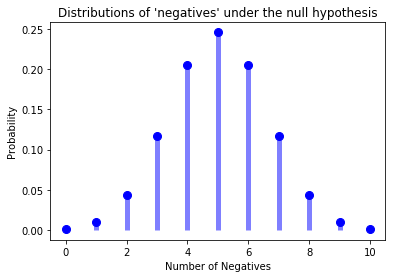

In [75]:
# Let's plot the distribution of "negatives" assuming the null hypothesis is true

from scipy import stats

n, p = 10, 0.5

fig, ax = plt.subplots(1, 1)

# let's calculate the x values
x = np.arange(stats.binom.ppf(0.00001, n, p), stats.binom.ppf(1.000, n, p)+1)

# let's plot it
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set_title("Distributions of \'negatives' under the null hypothesis")
ax.set_xlabel("Number of Negatives")
ax.set_ylabel("Probability")

In [76]:
# this gives the x value for a given cummulative probability
stats.binom.ppf(0.65, n, p)

6.0

In [77]:
# This computes the probability value for a given x value
# Note: It doesn't compute cummulative probability but only the probability associated with the given x
# (This is in reference to the binomial distribution, for others it will be different)
# Uses the required function to do so
stats.binom.pmf(5, n, p)

0.24609375000000025

**Interpretation from the graph**

From the graph, we can see that if the median was 13, then the probability of getting 5 'negatives' is 0.24.
<br>Number of 'negatives' in our sample: 7
<br>p-value associated with 7 (Probability of getting atleast 7 negatives) is: 0.172 [P(7) + P(8) + P(9) + P(10)]
<br>In case of two tailed tests, multiply this value by 2

In [78]:
# calculation of p-value
count=0
for i in range(7, 11):
    count+=stats.binom.pmf(i, n, p)
count

0.17187500000000014

since, p>alpha, we fail to reject the null hypothesis.
<br>Therefore, there's not enough level of evidence (at 5% level of significance) to suggest the median level of Hg for vegetarian women is less than 13.0g/dL

# Wilcoxon signed-rank test

Notice that the only piece of information we were using for the sign test was whether each Observation was either "positive" or "negative" when compared to the median. In other words, whether it's on one side or the other side of the median value. It's the "sign" we were really interested in.

We're about to incorporate an extra piece of Information in the Wilcoxon signed-rank test.

Let's ask the question in the above example.
<br>*What if all the women above 13.0g/dL were only marginally above that level, whereas women below 13.0g/dL were significantly below*

We find that, in our example, the observations below the median are significantly below and the observations above the median are only marginally above.

So, is there a way to incorporate this "distance" from that median level in our test?
<br>Yes there is.

In Wilcoxon signed-rank test, we rank each of these differences  that are created from each of these observations

In [79]:
hg = pd.DataFrame(data=sample1, columns=["Hg Level"])
hg["Difference from the median"] = hg - 13.0
hg["Absolute Difference"] = hg["Difference from the median"].map(lambda x: abs(x))
# there's a built in method to calculate ranks
hg["Rank"] = hg["Absolute Difference"].rank()
# let's assign the signed rank
sr=[]
for i, j in zip(hg["Difference from the median"].map(lambda x: round(x, 2)), hg["Rank"]):
    if i>0:
        sr.append(j)
    else:
        sr.append(-j)
hg["Signed Rank"] = sr
hg

,Hg Level,Difference from the median,Absolute Difference,Rank,Signed Rank
0,12.3,-0.7,0.7,3.5,-3.5
1,13.1,0.1,0.1,1.0,1.0
2,11.3,-1.7,1.7,7.0,-7.0
3,10.1,-2.9,2.9,10.0,-10.0
4,14.0,1.0,1.0,5.0,5.0
5,13.3,0.3,0.3,2.0,2.0
6,10.5,-2.5,2.5,9.0,-9.0
7,12.3,-0.7,0.7,3.5,-3.5
8,10.9,-2.1,2.1,8.0,-8.0
9,11.9,-1.1,1.1,6.0,-6.0


The Wilcoxon signed rank test relies on the W-statistics. The W statistics is a non-parametric test, thus it does not need multivariate normality in the data.
<br>The W-statistic is simply the positive or negative sum of the signed ranks. 
<br>Keep in mind we're always comparing the smaller of the two test statistics with the critical value

In [80]:
# Let's calculate the w-statistic
w = hg["Signed Rank"].map(lambda x: x if x>0 else 0).sum() # sum of positive signed ranks
# sum of negative signed ranks (we take absolute value)
print(abs(hg["Signed Rank"].map(lambda x: x if x<0 else 0).sum())) 
w # w statistic is smaller of these two which is 8

47.0


8.0

For small samples, W can be compared to a critical value from a reference table.
<br>From the table, we get critical value as 10.
<br>Hence, we can reject the null hypothesis as 8<10.

For large samples with n>10 observations the W-statistics approximates a Normal Distribution.
<br>The z value is given by (Here T is W):
<br>Technically, in this formula, the T value (W) can be either of the test statistics (8 or 39) .But let's use 8.
![wstatistic](wstatistic.png)

Calculating from the above formula, we get z = 0.99.
<br>At 5% significance level, z critical = 1.645.
<br> Since z>z critical, we reject the null hypothesis.

So either way, we reject the null hypothesis.
<br>Means that the seven observations we had which were less than 13 had ranks that were quite a deal higher than the three observations that were greater than 13.

You'll notice that in our sign test, we couldn't reject the null hypothesis.
<br>So why contradicting test results for the same data set?
<br>Well, it all comes down to what kind of information we are feeding into it.
<br>For the sign test, we were only interested if the observations were less than 13 or greater than 13.
<br>But we also incorporated the ranks, not just signs in the wilcoxon test. And that was critical.

# Mann-Whitney U test

This test can be used to determine whether two independent samples were selected from populations having the same distribution.

Unlike the t-test it does not require the assumption of normal distributions.

*Assumptions*
<br>All the observations from both groups are independent of each other.
<br>Under the null hypothesis H0, the distributions of both populations are equal.
<br>The alternative hypothesis H1 is that the distributions are not equal.

**Example**

Haemoglobin levels (in g/dL) were sampled from ten female vegetarians and eight male vegetarians. Is there an evidence of a difference in the median haemoglobin levels.

**Null Hypothesis:** $\eta_{F}$ = $\eta_{F}$
<br>**Alternate Hypothesis:** $\eta_{F}$ $\neq$ $\eta_{F}$
<br>It's a two tailed test.

In [81]:
# data collected from male vegetarians
sample2= [10.8, 11.5, 11.8, 12.1, 12.8, 13.2, 13.5, 14.1]

In [82]:
# Let's create a dataframe

# female dataframe
female = pd.DataFrame(sample1, index=["female"]*len(sample1), columns=["Hg Levels"])
male = pd.DataFrame(sample2, index=["male"]*len(sample2), columns=["Hg Levels"])

In [91]:
# let's merge two dataframes and calculate the combined ranks
combined = pd.concat([female, male], sort=True)
combined["Combined Rank"] = combined["Hg Levels"].rank()
combined

,Hg Levels,Combined Rank
female,12.3,10.5
female,13.1,13.0
female,11.3,5.0
female,10.1,1.0
female,14.0,17.0
female,13.3,15.0
female,10.5,2.0
female,12.3,10.5
female,10.9,4.0
female,11.9,8.0


In [93]:
# now let's calculate the sum of male ranks and female ranks
tfemale = combined.loc["female", "Combined Rank"].sum() # 86
tmale = combined.loc["male", "Combined Rank"].sum() # 85

The test statistic is going to be the least of these two summed ranks i.e W = 85

Now, to find the expected value of W i.e value of W when null hypothesis is True, use the formula:
<br>$E(W)$ = $1/2*n1*(n1 + n2 + 1)$
<br>where,
<br>n1 - number of observations in the smaller sample
<br>n2 - number of observations in the larger sample

hence, $E(W)$ = $1/2*8*(8 + 10 + 1)$ = $76$

So, this means, assuming the null hypothesis is true, we'd expect the summed ranks to be 76
<br>But they're not. they're 85.

So, how do we assess whether that's far enough to reject the null hypothesis.

*If n is small*
<br>use a reference table to get the critical interval
<br>Hence we fail to reject the null hypothesis (from the reference table)

*If n is large*
<br>Again, it can be approximated to a normal distribution and the z value can be calculated as:
![zu](zu.png)

Plugging in the values, we get the z value as 0.80 which is less than 1.65 (z critical).
<br>Hence we fail to reject the null hypothesis. There is not enough evidence to say that the median of female differs from the median of male

*References*

https://www.youtube.com/watch?v=IcLSKko2tsg
<br>https://www.lboro.ac.uk/media/wwwlboroacuk/content/mlsc/downloads/2.1_signtest.pdf